##Dataset 1 (Original)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv")

In [3]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [4]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [8]:
df["Disease"].value_counts()

,count
Disease,
Anemia,623
Healthy,556
Diabetes,540
Thalasse,509
Thromboc,123


Setup ready.

Loading datasets...
Train shape: (2351, 25)  Test shape: (447, 25)

Train class counts:
 Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

Train/Val: (1880, 24) (471, 24)
Outliers in training set: 75/1880

Training XGBoost booster (with early stopping)...
[0]	train-mlogloss:1.46945	val-mlogloss:1.46962
[50]	train-mlogloss:0.10282	val-mlogloss:0.10331
[100]	train-mlogloss:0.01412	val-mlogloss:0.01437
[150]	train-mlogloss:0.00488	val-mlogloss:0.00495
[200]	train-mlogloss:0.00297	val-mlogloss:0.00301
[250]	train-mlogloss:0.00239	val-mlogloss:0.00243
[300]	train-mlogloss:0.00210	val-mlogloss:0.00214
[350]	train-mlogloss:0.00190	val-mlogloss:0.00193
[400]	train-mlogloss:0.00175	val-mlogloss:0.00178
[450]	train-mlogloss:0.00164	val-mlogloss:0.00165
[500]	train-mlogloss:0.00156	val-mlogloss:0.00157
[550]	train-mlogloss:0.00152	val-mlogloss:0.00152
[600]	train-mlogloss:0.00150	val-mlogloss:0.00150
[650]	train-mloglo

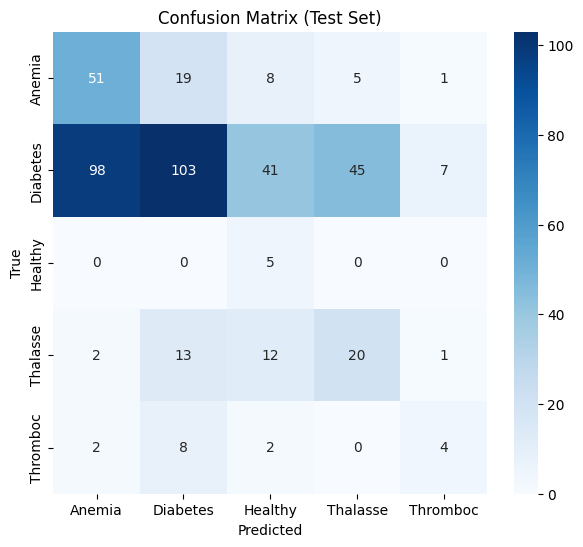


Initializing SHAP...
✓ SHAP explainer saved.

✓ PredictionPipeline initialized.


IndexError: index 5 is out of bounds for axis 0 with size 5

In [28]:
# ================================================================
# MEDIGUARD AI — FINAL FIXED MULTICLASS XGBOOST + SHAP PIPELINE
# ================================================================

# !pip install xgboost shap -q

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import xgboost as xgb
import shap
import joblib
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# CONFIG
# ----------------------------
MODEL_DIR = Path("/content/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

FEATURES = [
    'Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells',
    'Red Blood Cells','Hematocrit','Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure',
    'Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol',
    'ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein'
]

CLASS_NAMES = ['Anemia','Diabetes','Healthy','Thalasse','Thromboc']
NUM_CLASSES = len(CLASS_NAMES)

TRAIN_PATH = '/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv'
TEST_PATH  = '/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv'

print("Setup ready.")

# ================================================================
# SECTION 1 — LOAD DATA, ENCODE LABELS, SCALE, SPLIT
# ================================================================
print("\nLoading datasets...")
df = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

df_test = df_test[df_test['Disease'].isin(CLASS_NAMES)].copy()
print("Train shape:", df.shape, " Test shape:", df_test.shape)
print("\nTrain class counts:\n", df['Disease'].value_counts())

# Encode labels
le = LabelEncoder()
le.fit(CLASS_NAMES)

y = df['Disease']
if set(y.unique()) - set(CLASS_NAMES):
    raise ValueError("Train CSV contains unexpected class names.")

y_enc = le.transform(y)
X = df[FEATURES].values

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# Scale features
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)

joblib.dump(FEATURES, MODEL_DIR/"feature_columns.pkl")
joblib.dump(le, MODEL_DIR/"label_encoder.pkl")
joblib.dump(scaler, MODEL_DIR/"scaler.pkl")

print("\nTrain/Val:", X_train_s.shape, X_val_s.shape)

# ================================================================
# SECTION 2 — ISOLATION FOREST OUTLIER DETECTOR
# ================================================================
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train_s)
outliers_found = (iso.predict(X_train_s)==-1).sum()

print(f"Outliers in training set: {outliers_found}/{len(X_train_s)}")
joblib.dump(iso, MODEL_DIR/"outlier_detector.pkl")

# ================================================================
# SECTION 3 — TRAIN MULTICLASS XGBOOST BOOSTER (EARLY STOPPING)
# ================================================================
print("\nTraining XGBoost booster (with early stopping)...")

dtrain = xgb.DMatrix(X_train_s, label=y_train)
dval   = xgb.DMatrix(X_val_s,   label=y_val)

params = {
    'objective': 'multi:softprob',
    'num_class': NUM_CLASSES,
    'eval_metric': 'mlogloss',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=[(dtrain,'train'), (dval,'val')],
    early_stopping_rounds=30,
    verbose_eval=50
)

booster.save_model(str(MODEL_DIR/"xgb_multiclass_model.json"))
print("\n✓ Booster trained & saved.")

# Wrapper for compatibility
class BoosterWrapper:
    def __init__(self, booster):
        self.booster = booster

    def predict_proba(self, X):
        dm = xgb.DMatrix(X)
        return self.booster.predict(dm)

model = BoosterWrapper(booster)

# ================================================================
# SECTION 4 — VALIDATION & TEST EVALUATION
# ================================================================
print("\nEvaluating validation set...")
y_val_proba = model.predict_proba(X_val_s)
y_val_pred  = np.argmax(y_val_proba, axis=1)

print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation logloss:", log_loss(y_val, y_val_proba))
print("\nClassification Report (Validation):\n")
print(classification_report(y_val, y_val_pred, target_names=CLASS_NAMES, zero_division=0))

print("\nEvaluating TEST set...")
y_test_labels = df_test['Disease']
y_test_enc = le.transform(y_test_labels)
X_test_s = scaler.transform(df_test[FEATURES].values)

y_test_proba = model.predict_proba(X_test_s)
y_test_pred  = np.argmax(y_test_proba, axis=1)

print("Test accuracy:", accuracy_score(y_test_enc, y_test_pred))
print("Test logloss:", log_loss(y_test_enc, y_test_proba))
print("\nClassification Report (TEST):\n")
print(classification_report(y_test_enc, y_test_pred, target_names=CLASS_NAMES, zero_division=0))

# Confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test_enc, y_test_pred), annot=True, fmt='d',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ================================================================
# SECTION 5 — SHAP EXPLAINER
# ================================================================
print("\nInitializing SHAP...")
explainer = shap.TreeExplainer(booster)
joblib.dump(explainer, MODEL_DIR/"shap_explainer.pkl")
print("✓ SHAP explainer saved.")

# ================================================================
# SECTION 6 — PREDICTION PIPELINE
# ================================================================
class PredictionPipeline:
    def __init__(self, model, scaler, iso, le, explainer, features):
        self.model = model
        self.scaler = scaler
        self.iso = iso
        self.le = le
        self.explainer = explainer
        self.features = features
        self.class_names = CLASS_NAMES

    def predict(self, input_dict):
        # Validate
        if set(input_dict.keys()) != set(self.features):
            raise ValueError("Missing or extra features.")

        x = np.array([input_dict[f] for f in self.features]).reshape(1,-1)
        xs = self.scaler.transform(x)

        is_outlier = self.iso.predict(xs)[0] == -1

        probs = self.model.predict_proba(xs)[0]
        probs_dict = {cls: float(probs[i]) for i, cls in enumerate(self.class_names)}

        shap_vals = self.explainer.shap_values(xs)

        shap_dict = {}
        for i, cls in enumerate(self.class_names):
            vals = shap_vals[i][0]
            shap_dict[cls] = {self.features[j]: float(vals[j]) for j in range(len(self.features))}

        return {
            "probabilities": probs_dict,
            "is_outlier": bool(is_outlier),
            "shap_values": shap_dict
        }

pipeline = PredictionPipeline(model, scaler, iso, le, explainer, FEATURES)
print("\n✓ PredictionPipeline initialized.")

# ================================================================
# SECTION 7 — QUICK EXAMPLE
# ================================================================
example = {
    'Glucose':120.5,'Cholesterol':200,'Hemoglobin':13.5,'Platelets':250,
    'White Blood Cells':7.5,'Red Blood Cells':4.8,'Hematocrit':40,
    'Mean Corpuscular Volume':85,'Mean Corpuscular Hemoglobin':28,
    'Mean Corpuscular Hemoglobin Concentration':33,'Insulin':15,'BMI':26,
    'Systolic Blood Pressure':130,'Diastolic Blood Pressure':85,'Triglycerides':150,
    'HbA1c':6.5,'LDL Cholesterol':130,'HDL Cholesterol':40,'ALT':25,'AST':30,
    'Heart Rate':72,'Creatinine':0.9,'Troponin':0.01,'C-reactive Protein':2.0
}

res = pipeline.predict(example)
print("\nExample prediction probabilities:\n", res['probabilities'])
print("Outlier:", res['is_outlier'])

print("\nTop 5 SHAP features for predicted class:")
pred_cls = max(res['probabilities'], key=res['probabilities'].get)
sh = res['shap_values'][pred_cls]
for k,v in sorted(sh.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
    print(f"{k:35s} {v:+.4f}")

print("\n✓ DONE — pipeline fully repaired.")


In [27]:
print(df_test['Disease'].unique())


['Thalasse' 'Diabetes' 'Heart Di' 'Anemia' 'Thromboc' 'Healthy']


Config OK — features and classes set.
Train shape: (2351, 25)
Test raw shape: (486, 25)
Train class counts:
 Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64
Train/Val shapes: (1880, 24) (471, 24)
IsolationForest: 75/1880 training outliers detected
Train class counts (for weighting): {np.int64(0): np.int64(498), np.int64(1): np.int64(432), np.int64(2): np.int64(445), np.int64(3): np.int64(407), np.int64(4): np.int64(98)}

Training booster with anti-overfitting settings...
[0]	train-mlogloss:1.59170	validation-mlogloss:1.59249
[50]	train-mlogloss:0.93537	validation-mlogloss:0.97318
[100]	train-mlogloss:0.58636	validation-mlogloss:0.63117
[150]	train-mlogloss:0.39767	validation-mlogloss:0.43953
[200]	train-mlogloss:0.28274	validation-mlogloss:0.31897
[250]	train-mlogloss:0.20856	validation-mlogloss:0.23791
[300]	train-mlogloss:0.15937	validation-mlogloss:0.18221
[350]	train-mlogloss:0.12647	validation-mlogloss:0.14455
[400]

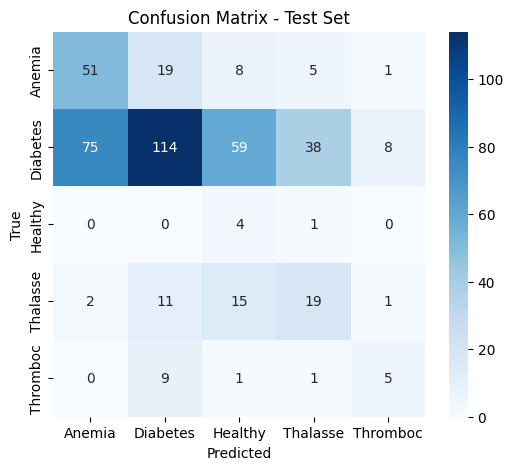


Building SHAP TreeExplainer (booster)...
SHAP explainer and sample saved.

Training pipeline fixed and saved. Artifacts under /content/models/
Files example: ['disease_labels.pkl', 'model_wrapper.pkl', 'xgb_multiclass_model.json', 'outlier_detector.pkl', 'feature_columns.pkl', 'scaler.pkl', 'shap_values_sample.pkl', 'multi_disease_xgb.pkl', 'prediction_pipeline.pkl', 'label_encoder.pkl', 'shap_explainers.pkl', 'xgb_multiclass_booster.json', 'shap_explainer.pkl']


In [33]:
# ========== FIXED TRAINING PIPELINE CELL ==========
# Run this in Colab (single cell). It replaces the previous training pipeline.

# !pip install xgboost shap -q

import os
from pathlib import Path
import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# ---------------- CONFIG ----------------
MODEL_DIR = Path("/content/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

FEATURES = [
    'Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells',
    'Red Blood Cells','Hematocrit','Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure',
    'Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol',
    'ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein'
]

CLASS_NAMES = ['Anemia','Diabetes','Healthy','Thalasse','Thromboc']
NUM_CLASSES = len(CLASS_NAMES)

TRAIN_PATH = '/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv'
TEST_PATH  = '/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv'

print("Config OK — features and classes set.")

# -------------- LOAD DATA --------------
df = pd.read_csv(TRAIN_PATH)
df_test_raw = pd.read_csv(TEST_PATH)

print("Train shape:", df.shape)
print("Test raw shape:", df_test_raw.shape)
print("Train class counts:\n", df['Disease'].value_counts())

# Filter test to only known classes to avoid unknown labels (e.g., 'Heart Di')
df_test = df_test_raw[df_test_raw['Disease'].isin(CLASS_NAMES)].copy()
dropped = len(df_test_raw) - len(df_test)
if dropped:
    print(f"Warning: Dropped {dropped} test rows with unknown/invalid labels (e.g., 'Heart Di').")

# -------------- LABEL ENCODING --------------
le = LabelEncoder()
le.fit(CLASS_NAMES)  # lock mapping/order

# Ensure training labels are valid
if set(df['Disease'].unique()) - set(CLASS_NAMES):
    raise ValueError("Train CSV contains unexpected labels; check CLASS_NAMES.")

y = le.transform(df['Disease'].values)
X = df[FEATURES].values

# -------------- TRAIN/VALID SPLIT --------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train/Val shapes:", X_train.shape, X_val.shape)

# -------------- SCALING (for IsolationForest / optional) --------------
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
joblib.dump(scaler, MODEL_DIR/"scaler.pkl")
joblib.dump(FEATURES, MODEL_DIR/"feature_columns.pkl")
joblib.dump(le, MODEL_DIR/"label_encoder.pkl")

# -------------- OUTLIER DETECTION --------------
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train_s)
outliers_train = (iso.predict(X_train_s) == -1).sum()
print(f"IsolationForest: {outliers_train}/{len(X_train_s)} training outliers detected")
joblib.dump(iso, MODEL_DIR/"outlier_detector.pkl")

# -------------- SAMPLE WEIGHTS (class reweighting) --------------
# Compute inverse-frequency weights to boost minority class influence
(unique, counts) = np.unique(y_train, return_counts=True)
class_freq = dict(zip(unique, counts))
print("Train class counts (for weighting):", class_freq)

# inverse freq: weight = total_count / (num_classes * count_for_class)
total = len(y_train)
class_weight = {cls: total / (NUM_CLASSES * cnt) for cls, cnt in class_freq.items()}
sample_weights = np.array([class_weight[label] for label in y_train], dtype=float)
# Normalize weights to have mean 1 (optional, keeps objective scale stable)
sample_weights = sample_weights / np.mean(sample_weights)

# -------------- XGBoost params (stronger regularization to reduce overfitting) --------------
params = {
    "objective": "multi:softprob",
    "num_class": NUM_CLASSES,
    "eval_metric": "mlogloss",

    # Learning/complexity
    "eta": 0.02,
    "max_depth": 2,
    "min_child_weight": 5,
    "gamma": 2,

    # Feature/row subsampling
    "subsample": 0.6,
    "colsample_bytree": 0.6,

    # Regularization
    "lambda": 5.0,
    "alpha": 3.0,
    "max_delta_step": 1,

    "seed": 42
}

# -------------- DMatrix with weights --------------
dtrain = xgb.DMatrix(X_train_s, label=y_train, weight=sample_weights)
dval   = xgb.DMatrix(X_val_s,   label=y_val)

# -------------- TRAIN (Booster API with early stopping) --------------
print("\nTraining booster with anti-overfitting settings...")
evals = [(dtrain, "train"), (dval, "validation")]

booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=800,         # reduced from 3000
    evals=evals,
    early_stopping_rounds=30,    # reduced from 50
    verbose_eval=50
)


# Save booster (json)
booster_path = MODEL_DIR / "xgb_multiclass_booster.json"
booster.save_model(str(booster_path))
print("Booster saved to:", booster_path)

# Lightweight wrapper to provide predict_proba(X) for compatibility
class BoosterWrapper:
    def __init__(self, booster):
        self.booster = booster
    def predict_proba(self, X):
        d = xgb.DMatrix(X)
        return self.booster.predict(d)

model = BoosterWrapper(booster)
joblib.dump(model, MODEL_DIR/"model_wrapper.pkl")  # wrapper pickles the object (note: saves small wrapper; booster saved separately)

# -------------- EVALUATION (VAL + TEST) --------------
print("\nValidation evaluation:")
y_val_proba = model.predict_proba(X_val_s)
y_val_pred = np.argmax(y_val_proba, axis=1)
print("Val accuracy:", accuracy_score(y_val, y_val_pred))
print("Val logloss:", log_loss(y_val, y_val_proba))
print("\nVal classification report:")
print(classification_report(y_val, y_val_pred, target_names=CLASS_NAMES, zero_division=0))

# Prepare and evaluate test set (ONLY expected classes retained earlier)
X_test = df_test[FEATURES].values
X_test_s = scaler.transform(X_test)
y_test_enc = le.transform(df_test['Disease'].values)

y_test_proba = model.predict_proba(X_test_s)
y_test_pred = np.argmax(y_test_proba, axis=1)

print("\nTest evaluation:")
print("Test accuracy:", accuracy_score(y_test_enc, y_test_pred))
print("Test logloss:", log_loss(y_test_enc, y_test_proba))
print("\nTest classification report:")
print(classification_report(y_test_enc, y_test_pred, target_names=CLASS_NAMES, zero_division=0))

# Confusion matrix for test
cm = confusion_matrix(y_test_enc, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.show()

# -------------- SHAP (TreeExplainer on booster) --------------
print("\nBuilding SHAP TreeExplainer (booster)...")
explainer = shap.TreeExplainer(booster)
# compute shap on a subset to save time
subset_idx = np.random.choice(len(X_val_s), size=min(200, len(X_val_s)), replace=False)
X_shap = X_val_s[subset_idx]
shap_values_sample = explainer.shap_values(X_shap)  # will be list or array depending on shap/xgb versions

joblib.dump(explainer, MODEL_DIR/"shap_explainer.pkl")
joblib.dump(shap_values_sample, MODEL_DIR/"shap_values_sample.pkl")
print("SHAP explainer and sample saved.")

# -------------- SIMPLE PREDICTION PIPELINE CLASS --------------
class PredictionPipeline:
    def __init__(self, booster, scaler, iso, label_encoder, explainer, features, class_names):
        self.booster = booster
        self.model = BoosterWrapper(booster)
        self.scaler = scaler
        self.iso = iso
        self.le = label_encoder
        self.explainer = explainer
        self.features = features
        self.class_names = class_names

    def predict(self, input_dict, return_shap=True):
        # Basic validation
        missing = set(self.features) - set(input_dict.keys())
        if missing:
            raise ValueError(f"Missing features: {missing}")
        x = np.array([input_dict[f] for f in self.features]).reshape(1,-1)
        x_s = self.scaler.transform(x)
        is_outlier = (self.iso.predict(x_s)[0] == -1)
        probs = self.model.predict_proba(x_s)[0]
        probs_dict = {cls: float(probs[i]) for i, cls in enumerate(self.class_names)}

        shap_dict = {}
        if return_shap and self.explainer is not None:
            sv = self.explainer.shap_values(x_s)
            # handle various shapes
            if isinstance(sv, list):
                for i, cls in enumerate(self.class_names):
                    arr = np.array(sv[i])
                    vals = arr[0] if arr.ndim == 2 else arr
                    shap_dict[cls] = {self.features[j]: float(vals[j]) for j in range(len(self.features))}
            else:
                arr = np.array(sv)
                if arr.ndim == 3:  # (n_classes, n_samples, n_features) or (n_samples, n_classes, n_features)
                    # try both orders
                    if arr.shape[0] == len(self.class_names):
                        for i, cls in enumerate(self.class_names):
                            vals = arr[i,0,:]
                            shap_dict[cls] = {self.features[j]: float(vals[j]) for j in range(len(self.features))}
                    else:
                        for i, cls in enumerate(self.class_names):
                            vals = arr[0,i,:]
                            shap_dict[cls] = {self.features[j]: float(vals[j]) for j in range(len(self.features))}
                elif arr.ndim == 2:
                    vals = arr[0]
                    shap_dict[self.class_names[0]] = {self.features[j]: float(vals[j]) for j in range(len(self.features))}
                else:
                    raise RuntimeError(f"Unrecognized SHAP shape: {arr.shape}")

        return {
            "probabilities": probs_dict,
            "is_outlier": bool(is_outlier),
            "shap_values": shap_dict
        }

# instantiate pipeline for quick tests
pipeline = PredictionPipeline(booster, scaler, iso, le, explainer, FEATURES, CLASS_NAMES)
joblib.dump(pipeline, MODEL_DIR/"prediction_pipeline.pkl")

print("\nTraining pipeline fixed and saved. Artifacts under /content/models/")
print("Files example:", os.listdir(MODEL_DIR)[:20])
# ================================= END =================================


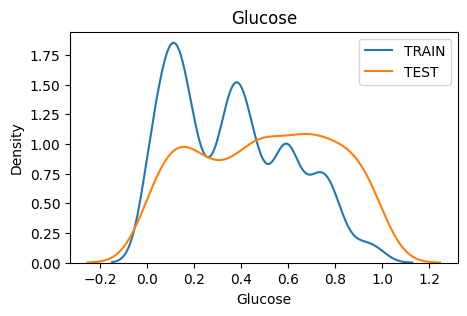

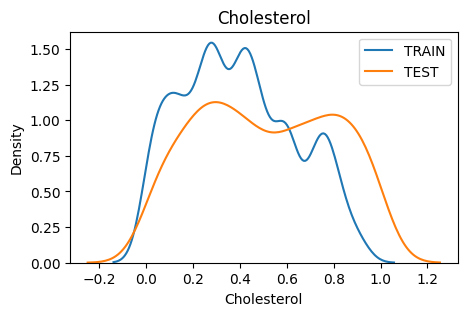

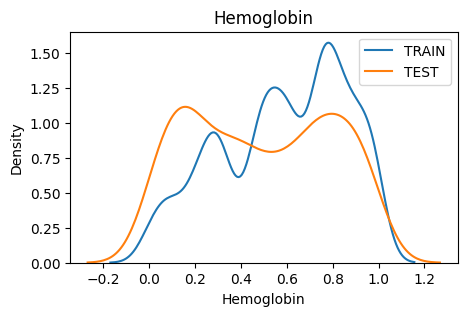

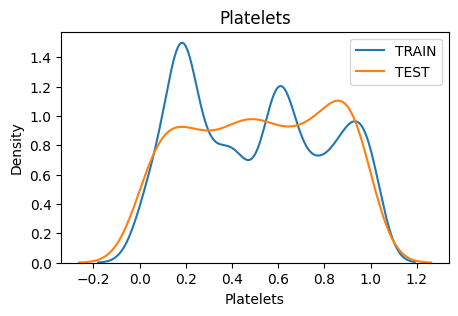

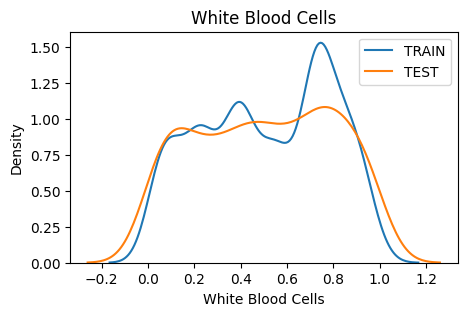

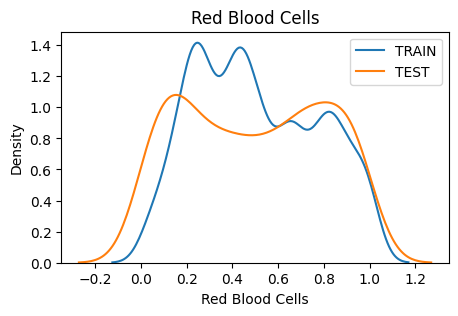

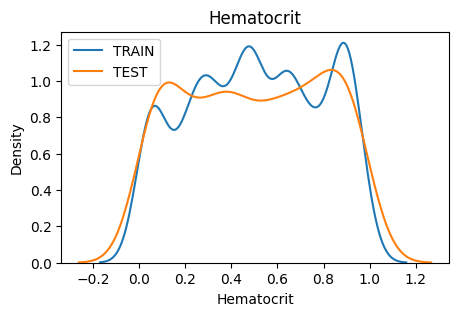

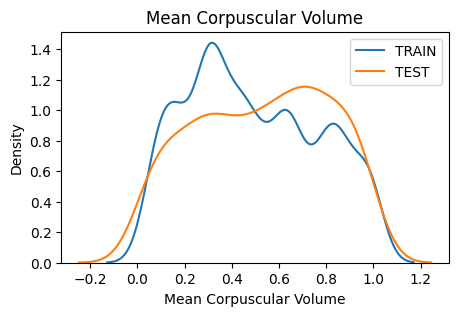

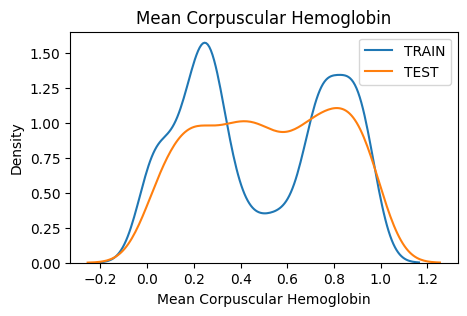

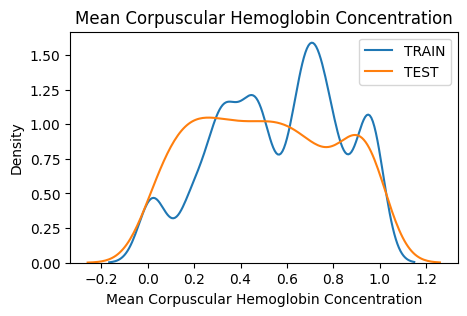

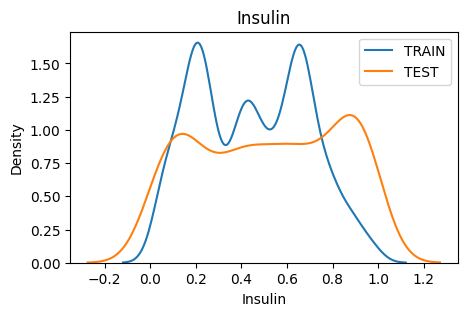

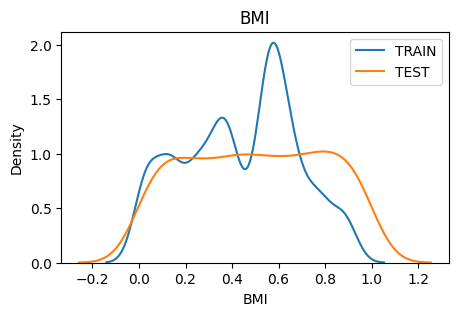

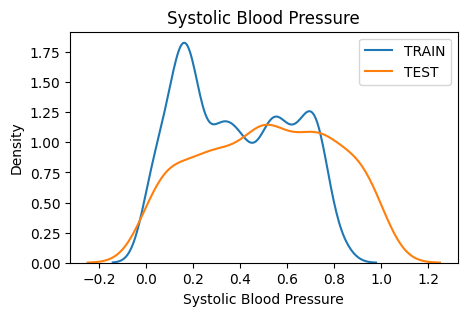

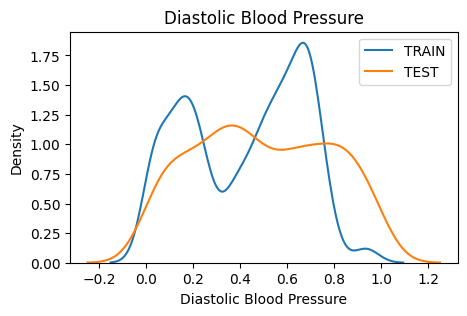

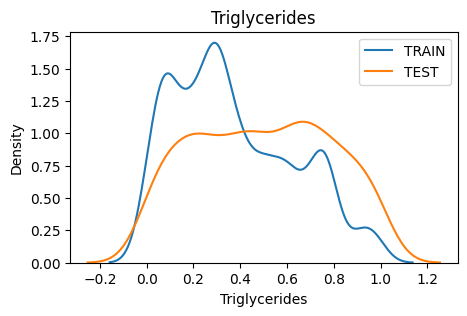

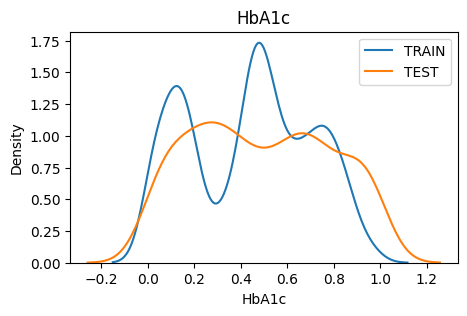

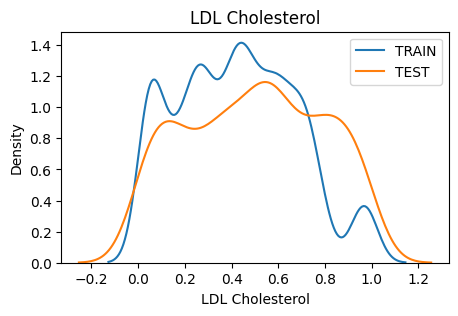

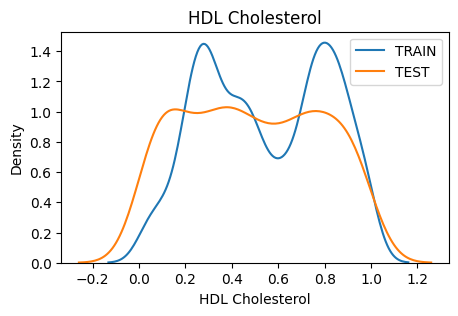

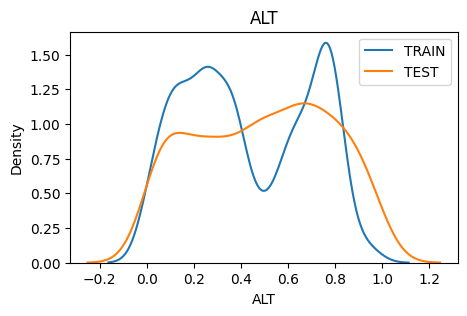

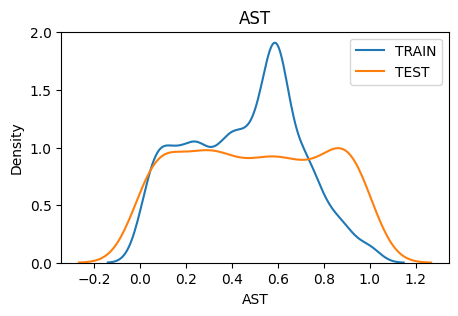

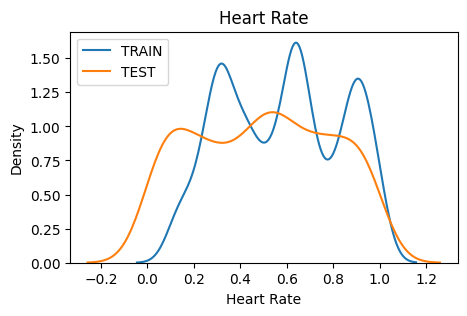

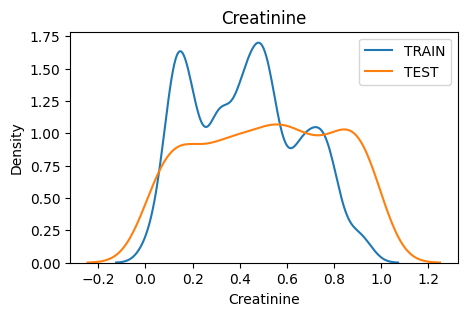

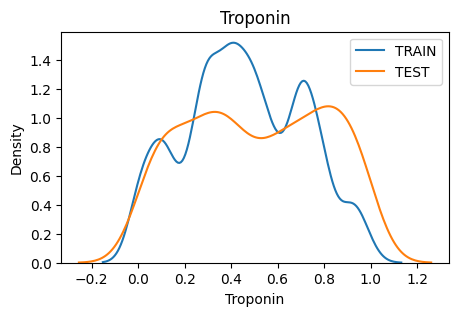

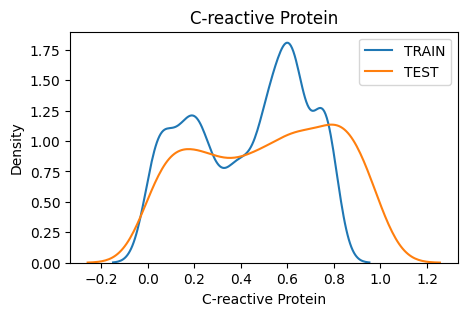

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in FEATURES:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df[col], label='TRAIN')
    sns.kdeplot(df_test[col], label='TEST')
    plt.title(col)
    plt.legend()
    plt.show()


In [31]:
df.shape

(2351, 25)

In [32]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [36]:
df.duplicated().sum()

np.int64(2286)

In [44]:
df.drop_duplicates(inplace = True)

In [45]:
df.shape()

TypeError: 'tuple' object is not callable

In [48]:
df["Cholesterol"].nunique()

65

In [112]:
df = pd.read_csv("/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv")

In [113]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

Final Code as of 22/11, 17:12 

Config OK — features and classes set.
Second dataset shape: (2351, 25)
New unique rows found: (486, 25)
Final merged dataset shape: (972, 25)
Final class distribution:
 Disease
Diabetes    588
Anemia      168
Thalasse     96
Heart Di     78
Thromboc     32
Healthy      10
Name: count, dtype: int64
Dataset shape: (894, 25)
Class counts:
 Disease
Diabetes    588
Anemia      168
Thalasse     96
Thromboc     32
Healthy      10
Name: count, dtype: int64
Train: (625, 24), Val: (134, 24), Test: (135, 24)
IsolationForest detected 31 outliers
Train class counts: {np.int64(0): np.int64(118), np.int64(1): np.int64(411), np.int64(2): np.int64(7), np.int64(3): np.int64(67), np.int64(4): np.int64(22)}

Training XGBoost booster...
[0]	train-mlogloss:1.59477	validation-mlogloss:1.59581
[50]	train-mlogloss:1.04887	validation-mlogloss:1.15709
[100]	train-mlogloss:0.75604	validation-mlogloss:0.90612
[150]	train-mlogloss:0.58377	validation-mlogloss:0.75120
[200]	train-mlogloss:0.47671	validation-mlogloss:

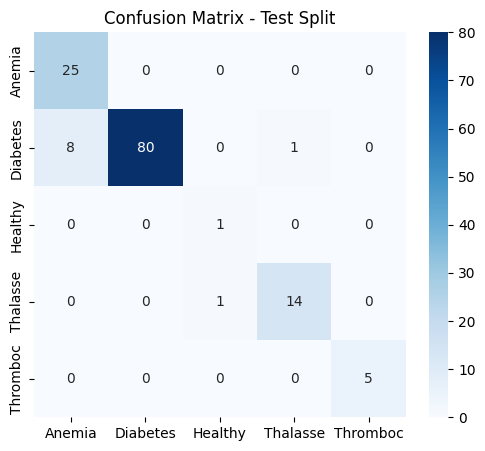


Building SHAP explainer...

Pipeline ready. Everything saved in /content/models/


In [116]:
# ========== FIXED TRAINING PIPELINE: Single CSV, internal train/val/test split ==========

import os
from pathlib import Path
import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# ---------------- CONFIG ----------------
MODEL_DIR = Path("/content/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

FEATURES = [
    'Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells',
    'Red Blood Cells','Hematocrit','Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure',
    'Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol',
    'ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein'
]

CLASS_NAMES = ['Anemia','Diabetes','Healthy','Thalasse','Thromboc']
NUM_CLASSES = len(CLASS_NAMES)

TRAIN_PATH = '/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv'

print("Config OK — features and classes set.")

# -------------- LOAD DATA --------------
df = pd.read_csv(TRAIN_PATH)
# ---- MERGE WITH SECOND DATASET (REMOVE DUPLICATES FIRST) ----

SECOND_PATH = "/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv"

df2 = pd.read_csv(SECOND_PATH)

# keep only Disease classes we allow
df2 = df2[df2['Disease'].isin(CLASS_NAMES)].copy()

# drop rows in df2 that already exist in df
df2_dedup = pd.concat([df, df2]).drop_duplicates(keep=False)

print("Second dataset shape:", df2.shape)
print("New unique rows found:", df2_dedup.shape)

# merge — only the new unique rows
df = pd.concat([df, df2_dedup], ignore_index=True)

print("Final merged dataset shape:", df.shape)
print("Final class distribution:\n", df['Disease'].value_counts())

df = df[df['Disease'].isin(CLASS_NAMES)].copy()
print("Dataset shape:", df.shape)
print("Class counts:\n", df['Disease'].value_counts())

# -------------- LABEL ENCODING --------------
le = LabelEncoder()
le.fit(CLASS_NAMES)

if set(df['Disease'].unique()) - set(CLASS_NAMES):
    raise ValueError("Dataset contains labels not in CLASS_NAMES!")

y = le.transform(df['Disease'].values)
X = df[FEATURES].values

# -------------- TRAIN/VAL/TEST SPLIT --------------
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=1, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# -------------- SCALING --------------
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

joblib.dump(scaler, MODEL_DIR/"scaler.pkl")
joblib.dump(FEATURES, MODEL_DIR/"feature_columns.pkl")
joblib.dump(le, MODEL_DIR/"label_encoder.pkl")

# -------------- OUTLIER DETECTION --------------
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train_s)
print(f"IsolationForest detected {(iso.predict(X_train_s) == -1).sum()} outliers")
joblib.dump(iso, MODEL_DIR/"outlier_detector.pkl")

# -------------- SAMPLE WEIGHTS --------------
(classes_unique, counts) = np.unique(y_train, return_counts=True)
class_freq = dict(zip(classes_unique, counts))
print("Train class counts:", class_freq)

total = len(y_train)
class_weight = {cls: total/(NUM_CLASSES*cnt) for cls, cnt in class_freq.items()}
sample_weights = np.array([class_weight[l] for l in y_train])
sample_weights = sample_weights / np.mean(sample_weights)

# -------------- XGBoost params --------------
params = {
    "objective": "multi:softprob",
    "num_class": NUM_CLASSES,
    "eval_metric": "mlogloss",
    "eta": 0.02,
    "max_depth": 2,
    "min_child_weight": 5,
    "gamma": 2,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "lambda": 5.0,
    "alpha": 3.0,
    "max_delta_step": 1,
    "seed": 42
}

dtrain = xgb.DMatrix(X_train_s, label=y_train, weight=sample_weights)
dval   = xgb.DMatrix(X_val_s,   label=y_val)
dtest  = xgb.DMatrix(X_test_s,  label=y_test)

# -------------- TRAIN MODEL --------------
print("\nTraining XGBoost booster...")
evals = [(dtrain, "train"), (dval, "validation")]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=800,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=50
)

booster.save_model(str(MODEL_DIR/"xgb_multiclass_booster.json"))
print("Model saved.")

class BoosterWrapper:
    def __init__(self, booster):
        self.booster = booster
    def predict_proba(self, X):
        return self.booster.predict(xgb.DMatrix(X))

model = BoosterWrapper(booster)
joblib.dump(model, MODEL_DIR/"model_wrapper.pkl")

# -------------- VALIDATION EVALUATION --------------
print("\nValidation Evaluation:")
val_proba = model.predict_proba(X_val_s)
val_pred = np.argmax(val_proba, axis=1)
print(classification_report(y_val, val_pred, target_names=CLASS_NAMES, zero_division=0))

# -------------- TEST EVALUATION --------------
print("\nTest Evaluation:")
test_proba = model.predict_proba(X_test_s)
test_pred = np.argmax(test_proba, axis=1)
print(classification_report(y_test, test_pred, target_names=CLASS_NAMES, zero_division=0))

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.title("Confusion Matrix - Test Split")
plt.show()

# -------------- SHAP EXPLAINER --------------
print("\nBuilding SHAP explainer...")
explainer = shap.TreeExplainer(booster)
subset = np.random.choice(len(X_val_s), size=min(200, len(X_val_s)), replace=False)
shap_vals = explainer.shap_values(X_val_s[subset])
joblib.dump(explainer, MODEL_DIR/"shap_explainer.pkl")
joblib.dump(shap_vals, MODEL_DIR/"shap_values_sample.pkl")

print("\nPipeline ready. Everything saved in /content/models/")


Config OK — features and classes set.
Original df size: (486, 25)
Second df size: (2351, 25)
Unique rows in df2 only: (2351, 25)
Final merged df size: (2837, 25)
Final class distribution:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64
Dataset shape: (2798, 25)
Class counts:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Name: count, dtype: int64
Train: (1958, 24), Val: (420, 24), Test: (420, 24)
IsolationForest detected 96 outliers
Train class counts: {np.int64(0): np.int64(495), np.int64(1): np.int64(584), np.int64(2): np.int64(392), np.int64(3): np.int64(390), np.int64(4): np.int64(97)}

Training XGBoost booster...
[0]	train-mlogloss:1.59261	validation-mlogloss:1.59410
[50]	train-mlogloss:0.99607	validation-mlogloss:1.06388
[100]	train-mlogloss:0.68254	validation-mlogloss:0.76762
[150]	train-mlogloss:0.50642	validation-mlogloss:0.58612
[200]	train-mlogloss:0.3

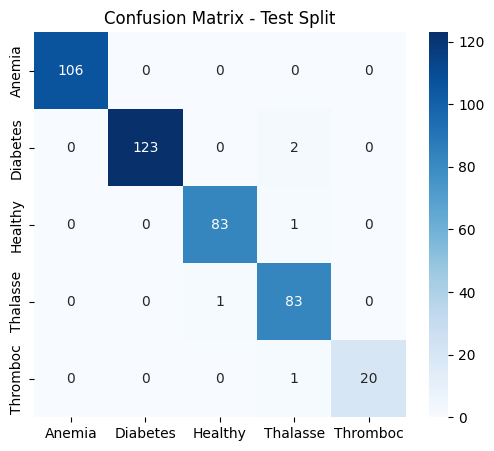


Building SHAP explainer...

Pipeline ready. Everything saved in /content/models/


In [119]:
# ========== FIXED TRAINING PIPELINE: Single CSV, internal train/val/test split ==========

import os
from pathlib import Path
import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# ---------------- CONFIG ----------------
MODEL_DIR = Path("/content/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

FEATURES = [
    'Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells',
    'Red Blood Cells','Hematocrit','Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure',
    'Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol',
    'ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein'
]

CLASS_NAMES = ['Anemia','Diabetes','Healthy','Thalasse','Thromboc']
NUM_CLASSES = len(CLASS_NAMES)

TRAIN_PATH = '/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv'

print("Config OK — features and classes set.")

# -------------- LOAD DATA --------------
df = pd.read_csv(TRAIN_PATH)
# ---- MERGE WITH SECOND DATASET (REMOVE DUPLICATES FIRST) ----

SECOND_PATH = "/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv"

df2 = pd.read_csv(SECOND_PATH)

# keep only allowed classes
df2 = df2[df2['Disease'].isin(CLASS_NAMES)].copy()

# ensure identical column ordering
df2 = df2[df.columns]

# find rows in df2 that are NOT in df (row-wise comparison)
df2_unique = df2.merge(df, how="outer", indicator=True)
df2_unique = df2_unique[df2_unique['_merge'] == 'left_only']
df2_unique = df2_unique.drop(columns=['_merge'])

print("Original df size:", df.shape)
print("Second df size:", df2.shape)
print("Unique rows in df2 only:", df2_unique.shape)

# append ONLY unique rows from df2
df = pd.concat([df, df2_unique], ignore_index=True)

print("Final merged df size:", df.shape)
print("Final class distribution:\n", df['Disease'].value_counts())

df = df[df['Disease'].isin(CLASS_NAMES)].copy()
print("Dataset shape:", df.shape)
print("Class counts:\n", df['Disease'].value_counts())

# -------------- LABEL ENCODING --------------
le = LabelEncoder()
le.fit(CLASS_NAMES)

if set(df['Disease'].unique()) - set(CLASS_NAMES):
    raise ValueError("Dataset contains labels not in CLASS_NAMES!")

y = le.transform(df['Disease'].values)
X = df[FEATURES].values

# -------------- TRAIN/VAL/TEST SPLIT --------------
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=1, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# -------------- SCALING --------------
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

joblib.dump(scaler, MODEL_DIR/"scaler.pkl")
joblib.dump(FEATURES, MODEL_DIR/"feature_columns.pkl")
joblib.dump(le, MODEL_DIR/"label_encoder.pkl")

# -------------- OUTLIER DETECTION --------------
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train_s)
print(f"IsolationForest detected {(iso.predict(X_train_s) == -1).sum()} outliers")
joblib.dump(iso, MODEL_DIR/"outlier_detector.pkl")

# -------------- SAMPLE WEIGHTS --------------
(classes_unique, counts) = np.unique(y_train, return_counts=True)
class_freq = dict(zip(classes_unique, counts))
print("Train class counts:", class_freq)

total = len(y_train)
class_weight = {cls: total/(NUM_CLASSES*cnt) for cls, cnt in class_freq.items()}
sample_weights = np.array([class_weight[l] for l in y_train])
sample_weights = sample_weights / np.mean(sample_weights)

# -------------- XGBoost params --------------
params = {
    "objective": "multi:softprob",
    "num_class": NUM_CLASSES,
    "eval_metric": "mlogloss",
    "eta": 0.02,
    "max_depth": 2,
    "min_child_weight": 5,
    "gamma": 2,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "lambda": 5.0,
    "alpha": 3.0,
    "max_delta_step": 1,
    "seed": 42
}

dtrain = xgb.DMatrix(X_train_s, label=y_train, weight=sample_weights)
dval   = xgb.DMatrix(X_val_s,   label=y_val)
dtest  = xgb.DMatrix(X_test_s,  label=y_test)

# -------------- TRAIN MODEL --------------
print("\nTraining XGBoost booster...")
evals = [(dtrain, "train"), (dval, "validation")]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=800,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=50
)

booster.save_model(str(MODEL_DIR/"xgb_multiclass_booster.json"))
print("Model saved.")

class BoosterWrapper:
    def __init__(self, booster):
        self.booster = booster
    def predict_proba(self, X):
        return self.booster.predict(xgb.DMatrix(X))

model = BoosterWrapper(booster)
joblib.dump(model, MODEL_DIR/"model_wrapper.pkl")

# -------------- VALIDATION EVALUATION --------------
print("\nValidation Evaluation:")
val_proba = model.predict_proba(X_val_s)
val_pred = np.argmax(val_proba, axis=1)
print(classification_report(y_val, val_pred, target_names=CLASS_NAMES, zero_division=0))

# -------------- TEST EVALUATION --------------
print("\nTest Evaluation:")
test_proba = model.predict_proba(X_test_s)
test_pred = np.argmax(test_proba, axis=1)
print(classification_report(y_test, test_pred, target_names=CLASS_NAMES, zero_division=0))

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.title("Confusion Matrix - Test Split")
plt.show()

# -------------- SHAP EXPLAINER --------------
print("\nBuilding SHAP explainer...")
explainer = shap.TreeExplainer(booster)
subset = np.random.choice(len(X_val_s), size=min(200, len(X_val_s)), replace=False)
shap_vals = explainer.shap_values(X_val_s[subset])
joblib.dump(explainer, MODEL_DIR/"shap_explainer.pkl")
joblib.dump(shap_vals, MODEL_DIR/"shap_values_sample.pkl")

print("\nPipeline ready. Everything saved in /content/models/")


In [117]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np
import xgboost as xgb

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = []
macro_recall_scores = []

print("\nRunning 5-Fold Stratified Cross-Validation...\n")

fold = 1
for train_idx, val_idx in kfold.split(X, y):
    print(f"=== Fold {fold} ===")

    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    # scale with your existing scaler
    X_train_cv_s = scaler.fit_transform(X_train_cv)
    X_val_cv_s   = scaler.transform(X_val_cv)

    # compute weights per fold
    cls, counts = np.unique(y_train_cv, return_counts=True)
    total = len(y_train_cv)
    class_weight = {c: total/(NUM_CLASSES*cnt) for c, cnt in zip(cls, counts)}
    sw = np.array([class_weight[l] for l in y_train_cv])
    sw = sw / np.mean(sw)

    dtrain_cv = xgb.DMatrix(X_train_cv_s, label=y_train_cv, weight=sw)
    dval_cv   = xgb.DMatrix(X_val_cv_s,   label=y_val_cv)

    booster_cv = xgb.train(
        params=params,
        dtrain=dtrain_cv,
        num_boost_round=800,
        evals=[(dval_cv, "validation")],
        early_stopping_rounds=30,
        verbose_eval=False
    )

    y_pred_cv = np.argmax(booster_cv.predict(dval_cv), axis=1)

    fold_acc = accuracy_score(y_val_cv, y_pred_cv)
    fold_recall = recall_score(y_val_cv, y_pred_cv, average="macro")

    acc_scores.append(fold_acc)
    macro_recall_scores.append(fold_recall)

    print(f"Fold accuracy: {fold_acc:.4f}")
    print(f"Fold macro recall: {fold_recall:.4f}\n")

    fold += 1

print("====== CROSS-VALIDATION SUMMARY ======")
print(f"Accuracy: mean={np.mean(acc_scores):.4f}, std={np.std(acc_scores):.4f}")
print(f"Macro recall: mean={np.mean(macro_recall_scores):.4f}, std={np.std(macro_recall_scores):.4f}")


Running 5-Fold Stratified Cross-Validation...

=== Fold 1 ===
Fold accuracy: 0.9497
Fold macro recall: 0.9638

=== Fold 2 ===
Fold accuracy: 0.9497
Fold macro recall: 0.9847

=== Fold 3 ===
Fold accuracy: 0.9553
Fold macro recall: 0.9821

=== Fold 4 ===
Fold accuracy: 0.9721
Fold macro recall: 0.9915

=== Fold 5 ===
Fold accuracy: 0.9494
Fold macro recall: 0.9804

====== CROSS-VALIDATION SUMMARY ======
Accuracy: mean=0.9553, std=0.0087
Macro recall: mean=0.9805, std=0.0092


In [118]:
df.shape

(894, 25)

Config OK — features and classes set.
Original df size: (486, 25)
Second df size: (2351, 25)
Unique rows in df2 only: (2351, 25)
Final merged df size: (2837, 25)
Final class distribution:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64
Dataset shape: (2798, 25)
Class counts:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Name: count, dtype: int64

================ FINAL DATASET USED FOR TRAINING ================
Final df shape: (2798, 25)
Feature matrix X shape: (2798, 24)
Target vector y shape: (2798,)
Class distribution:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Name: count, dtype: int64

Train: (1678, 24), Val: (560, 24), Test: (560, 24)
IsolationForest detected 74 outliers
Train class counts: {np.int64(0): np.int64(424), np.int64(1): np.int64(500), np.int64(2): np.int64(337), np.int64(3): np.int64(334), np.int64(

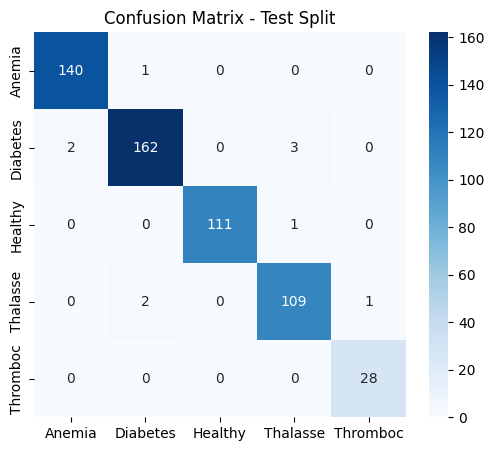


Building SHAP explainer...

Pipeline ready. Everything saved in /content/models/


In [133]:
# ========== FIXED TRAINING PIPELINE: Single CSV, internal train/val/test split ==========

import os
from pathlib import Path
import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# ---------------- CONFIG ----------------
MODEL_DIR = Path("/content/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

FEATURES = [
    'Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells',
    'Red Blood Cells','Hematocrit','Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure',
    'Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol',
    'ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein'
]

CLASS_NAMES = ['Anemia','Diabetes','Healthy','Thalasse','Thromboc']
NUM_CLASSES = len(CLASS_NAMES)

TRAIN_PATH = '/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv'

print("Config OK — features and classes set.")

# -------------- LOAD DATA --------------
df = pd.read_csv(TRAIN_PATH)
# ---- MERGE WITH SECOND DATASET (REMOVE DUPLICATES FIRST) ----

SECOND_PATH = "/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv"

df2 = pd.read_csv(SECOND_PATH)

# keep only allowed classes
df2 = df2[df2['Disease'].isin(CLASS_NAMES)].copy()

# ensure identical column ordering
df2 = df2[df.columns]

# find rows in df2 that are NOT in df (row-wise comparison)
df2_unique = df2.merge(df, how="outer", indicator=True)
df2_unique = df2_unique[df2_unique['_merge'] == 'left_only']
df2_unique = df2_unique.drop(columns=['_merge'])

print("Original df size:", df.shape)
print("Second df size:", df2.shape)
print("Unique rows in df2 only:", df2_unique.shape)

# append ONLY unique rows from df2
df = pd.concat([df, df2_unique], ignore_index=True)

print("Final merged df size:", df.shape)
print("Final class distribution:\n", df['Disease'].value_counts())

df = df[df['Disease'].isin(CLASS_NAMES)].copy()
print("Dataset shape:", df.shape)
print("Class counts:\n", df['Disease'].value_counts())

# -------------- LABEL ENCODING --------------
le = LabelEncoder()
le.fit(CLASS_NAMES)

if set(df['Disease'].unique()) - set(CLASS_NAMES):
    raise ValueError("Dataset contains labels not in CLASS_NAMES!")

y = le.transform(df['Disease'].values)
X = df[FEATURES].values

print("\n================ FINAL DATASET USED FOR TRAINING ================")
print("Final df shape:", df.shape)
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)
print("Class distribution:\n", df['Disease'].value_counts())
print("================================================================\n")

# -------------- TRAIN/VAL/TEST SPLIT --------------
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=1, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# -------------- SCALING --------------
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

joblib.dump(scaler, MODEL_DIR/"scaler.pkl")
joblib.dump(FEATURES, MODEL_DIR/"feature_columns.pkl")
joblib.dump(le, MODEL_DIR/"label_encoder.pkl")

# -------------- OUTLIER DETECTION --------------
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train_s)
print(f"IsolationForest detected {(iso.predict(X_train_s) == -1).sum()} outliers")
joblib.dump(iso, MODEL_DIR/"outlier_detector.pkl")

# -------------- SAMPLE WEIGHTS --------------
(classes_unique, counts) = np.unique(y_train, return_counts=True)
class_freq = dict(zip(classes_unique, counts))
print("Train class counts:", class_freq)

total = len(y_train)
class_weight = {cls: total/(NUM_CLASSES*cnt) for cls, cnt in class_freq.items()}
sample_weights = np.array([class_weight[l] for l in y_train])
sample_weights = sample_weights / np.mean(sample_weights)

# -------------- XGBoost params --------------
params = {
    "objective": "multi:softprob",
    "num_class": NUM_CLASSES,
    "eval_metric": "mlogloss",
    "eta": 0.02,
    "max_depth": 2,
    "min_child_weight": 5,
    "gamma": 2,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "lambda": 5.0,
    "alpha": 3.0,
    "max_delta_step": 1,
    "seed": 42
}

dtrain = xgb.DMatrix(X_train_s, label=y_train, weight=sample_weights)
dval   = xgb.DMatrix(X_val_s,   label=y_val)
dtest  = xgb.DMatrix(X_test_s,  label=y_test)

# -------------- TRAIN MODEL --------------
print("\nTraining XGBoost booster...")
evals = [(dtrain, "train"), (dval, "validation")]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=800,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=50
)

booster.save_model(str(MODEL_DIR/"xgb_multiclass_booster.json"))
print("Model saved.")

class BoosterWrapper:
    def __init__(self, booster):
        self.booster = booster
    def predict_proba(self, X):
        return self.booster.predict(xgb.DMatrix(X))

model = BoosterWrapper(booster)
joblib.dump(model, MODEL_DIR/"model_wrapper.pkl")

# -------------- VALIDATION EVALUATION --------------
print("\nValidation Evaluation:")
val_proba = model.predict_proba(X_val_s)
val_pred = np.argmax(val_proba, axis=1)
print(classification_report(y_val, val_pred, target_names=CLASS_NAMES, zero_division=0))

# -------------- TEST EVALUATION --------------
print("\nTest Evaluation:")
test_proba = model.predict_proba(X_test_s)
test_pred = np.argmax(test_proba, axis=1)
print(classification_report(y_test, test_pred, target_names=CLASS_NAMES, zero_division=0))

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.title("Confusion Matrix - Test Split")
plt.show()

# -------------- SHAP EXPLAINER --------------
print("\nBuilding SHAP explainer...")
explainer = shap.TreeExplainer(booster)
subset = np.random.choice(len(X_val_s), size=min(200, len(X_val_s)), replace=False)
shap_vals = explainer.shap_values(X_val_s[subset])
joblib.dump(explainer, MODEL_DIR/"shap_explainer.pkl")
joblib.dump(shap_vals, MODEL_DIR/"shap_values_sample.pkl")

print("\nPipeline ready. Everything saved in /content/models/")

Config OK — features and classes set.
Original df size: (486, 25)
Second df size: (2351, 25)
Unique rows in df2 only: (2351, 25)
Final merged df size: (2837, 25)
Final class distribution:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64
Dataset shape: (2798, 25)
Class counts:
 Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Name: count, dtype: int64

================ FINAL DATASET USED FOR TRAINING ================
Final df shape: (512, 25)
Feature matrix X shape: (512, 24)
Target vector y shape: (512,)
Class distribution:
 Disease
Diabetes    310
Anemia      100
Thalasse     62
Healthy      21
Thromboc     19
Name: count, dtype: int64

Train: (358, 24), Val: (77, 24), Test: (77, 24)
IsolationForest detected 18 outliers
Train class counts: {np.int64(0): np.int64(70), np.int64(1): np.int64(217), np.int64(2): np.int64(15), np.int64(3): np.int64(43), np.int64(4): np.in

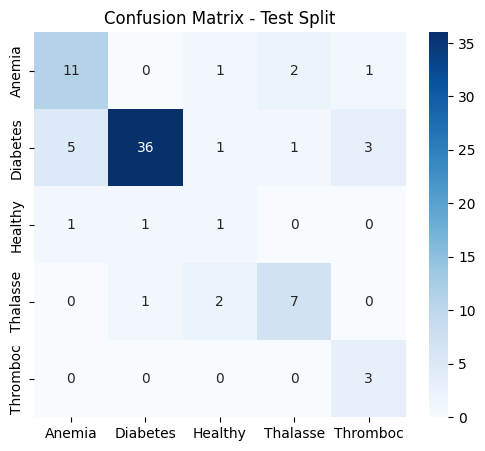


Building SHAP explainer...

Pipeline ready. Everything saved in /content/models/


In [132]:
# ========== FIXED TRAINING PIPELINE: Single CSV, internal train/val/test split ==========

import os
from pathlib import Path
import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# ---------------- CONFIG ----------------
MODEL_DIR = Path("/content/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

FEATURES = [
    'Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells',
    'Red Blood Cells','Hematocrit','Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure',
    'Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol',
    'ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein'
]

CLASS_NAMES = ['Anemia','Diabetes','Healthy','Thalasse','Thromboc']
NUM_CLASSES = len(CLASS_NAMES)

TRAIN_PATH = '/content/drive/MyDrive/REDACT/archive/blood_samples_dataset_test.csv'

print("Config OK — features and classes set.")

# -------------- LOAD DATA --------------
df = pd.read_csv(TRAIN_PATH)
# ---- MERGE WITH SECOND DATASET (REMOVE DUPLICATES FIRST) ----

SECOND_PATH = "/content/drive/MyDrive/REDACT/archive/Blood_samples_dataset_balanced_2(f).csv"

df2 = pd.read_csv(SECOND_PATH)

# keep only allowed classes
df2 = df2[df2['Disease'].isin(CLASS_NAMES)].copy()

# ensure identical column ordering
df2 = df2[df.columns]

# find rows in df2 that are NOT in df (row-wise comparison)
df2_unique = df2.merge(df, how="outer", indicator=True)
df2_unique = df2_unique[df2_unique['_merge'] == 'left_only']
df2_unique = df2_unique.drop(columns=['_merge'])

print("Original df size:", df.shape)
print("Second df size:", df2.shape)
print("Unique rows in df2 only:", df2_unique.shape)

# append ONLY unique rows from df2
df = pd.concat([df, df2_unique], ignore_index=True)

print("Final merged df size:", df.shape)
print("Final class distribution:\n", df['Disease'].value_counts())

df = df[df['Disease'].isin(CLASS_NAMES)].copy()
print("Dataset shape:", df.shape)
print("Class counts:\n", df['Disease'].value_counts())

df.drop_duplicates(inplace = True)
# -------------- LABEL ENCODING --------------
le = LabelEncoder()
le.fit(CLASS_NAMES)

if set(df['Disease'].unique()) - set(CLASS_NAMES):
    raise ValueError("Dataset contains labels not in CLASS_NAMES!")

y = le.transform(df['Disease'].values)
X = df[FEATURES].values

print("\n================ FINAL DATASET USED FOR TRAINING ================")
print("Final df shape:", df.shape)
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)
print("Class distribution:\n", df['Disease'].value_counts())
print("================================================================\n")

# -------------- TRAIN/VAL/TEST SPLIT --------------
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=1, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# -------------- SCALING --------------
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

joblib.dump(scaler, MODEL_DIR/"scaler.pkl")
joblib.dump(FEATURES, MODEL_DIR/"feature_columns.pkl")
joblib.dump(le, MODEL_DIR/"label_encoder.pkl")

# -------------- OUTLIER DETECTION --------------
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train_s)
print(f"IsolationForest detected {(iso.predict(X_train_s) == -1).sum()} outliers")
joblib.dump(iso, MODEL_DIR/"outlier_detector.pkl")

# -------------- SAMPLE WEIGHTS --------------
(classes_unique, counts) = np.unique(y_train, return_counts=True)
class_freq = dict(zip(classes_unique, counts))
print("Train class counts:", class_freq)

total = len(y_train)
class_weight = {cls: total/(NUM_CLASSES*cnt) for cls, cnt in class_freq.items()}
sample_weights = np.array([class_weight[l] for l in y_train])
sample_weights = sample_weights / np.mean(sample_weights)

# -------------- XGBoost params --------------
params = {
    "objective": "multi:softprob",
    "num_class": NUM_CLASSES,
    "eval_metric": "mlogloss",
    "eta": 0.02,
    "max_depth": 2,
    "min_child_weight": 5,
    "gamma": 2,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "lambda": 5.0,
    "alpha": 3.0,
    "max_delta_step": 1,
    "seed": 42
}

dtrain = xgb.DMatrix(X_train_s, label=y_train, weight=sample_weights)
dval   = xgb.DMatrix(X_val_s,   label=y_val)
dtest  = xgb.DMatrix(X_test_s,  label=y_test)

# -------------- TRAIN MODEL --------------
print("\nTraining XGBoost booster...")
evals = [(dtrain, "train"), (dval, "validation")]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=800,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=50
)

booster.save_model(str(MODEL_DIR/"xgb_multiclass_booster.json"))
print("Model saved.")

class BoosterWrapper:
    def __init__(self, booster):
        self.booster = booster
    def predict_proba(self, X):
        return self.booster.predict(xgb.DMatrix(X))

model = BoosterWrapper(booster)
joblib.dump(model, MODEL_DIR/"model_wrapper.pkl")

# -------------- VALIDATION EVALUATION --------------
print("\nValidation Evaluation:")
val_proba = model.predict_proba(X_val_s)
val_pred = np.argmax(val_proba, axis=1)
print(classification_report(y_val, val_pred, target_names=CLASS_NAMES, zero_division=0))

# -------------- TEST EVALUATION --------------
print("\nTest Evaluation:")
test_proba = model.predict_proba(X_test_s)
test_pred = np.argmax(test_proba, axis=1)
print(classification_report(y_test, test_pred, target_names=CLASS_NAMES, zero_division=0))

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.title("Confusion Matrix - Test Split")
plt.show()

# -------------- SHAP EXPLAINER --------------
print("\nBuilding SHAP explainer...")
explainer = shap.TreeExplainer(booster)
subset = np.random.choice(len(X_val_s), size=min(200, len(X_val_s)), replace=False)
shap_vals = explainer.shap_values(X_val_s[subset])
joblib.dump(explainer, MODEL_DIR/"shap_explainer.pkl")
joblib.dump(shap_vals, MODEL_DIR/"shap_values_sample.pkl")

print("\nPipeline ready. Everything saved in /content/models/")


In [135]:
import joblib
import numpy as np
import xgboost as xgb

# ---------------- LOAD ARTIFACTS ----------------
MODEL_DIR = Path("/content/models")

scaler         = joblib.load(MODEL_DIR/"scaler.pkl")
features       = joblib.load(MODEL_DIR/"feature_columns.pkl")
label_encoder  = joblib.load(MODEL_DIR/"label_encoder.pkl")
model_wrapper  = joblib.load(MODEL_DIR/"model_wrapper.pkl")   # This has model.predict_proba()

# ---------------- PREDICT FUNCTION ----------------
def predict_single(sample_dict):
    """
    sample_dict should be: {"Glucose": 90, "Cholesterol": 200, ...}
    All FEATURES must be present.
    """

    # ensure correct order of features
    x = np.array([sample_dict[f] for f in features], dtype=float).reshape(1, -1)

    # scale
    x_scaled = scaler.transform(x)

    # predict
    proba = model_wrapper.predict_proba(x_scaled)[0]
    pred_idx = np.argmax(proba)
    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    return pred_label, proba

# ---------------- EXAMPLE ----------------
sample = {
    'Glucose': 95,
    'Cholesterol': 180,
    'Hemoglobin': 1,
    'Platelets': 250,
    'White Blood Cells': 6000,
    'Red Blood Cells': 4,
    'Hematocrit': 43,
    'Mean Corpuscular Volume': 88,
    'Mean Corpuscular Hemoglobin': 29,
    'Mean Corpuscular Hemoglobin Concentration': 33,
    'Insulin': 12,
    'BMI': 17.2,
    'Systolic Blood Pressure': 120,
    'Diastolic Blood Pressure': 80,
    'Triglycerides': 140,
    'HbA1c': 5.4,
    'LDL Cholesterol': 110,
    'HDL Cholesterol': 55,
    'ALT': 20,
    'AST': 22,
    'Heart Rate': 75,
    'Creatinine': 0.9,
    'Troponin': 0.01,
    'C-reactive Protein': 2.0
}



In [139]:
feature_minmax = {
    "Glucose": (70, 140),
    "Cholesterol": (125, 200),
    "Hemoglobin": (13.5, 17.5),
    "Platelets": (150000, 450000),
    "White Blood Cells": (4000, 11000),
    "Red Blood Cells": (4.2, 5.4),
    "Hematocrit": (38, 52),
    "Mean Corpuscular Volume": (80, 100),
    "Mean Corpuscular Hemoglobin": (27, 33),
    "Mean Corpuscular Hemoglobin Concentration": (32, 36),
    "Insulin": (5, 25),
    "BMI": (18.5, 24.9),
    "Systolic Blood Pressure": (90, 120),
    "Diastolic Blood Pressure": (60, 80),
    "Triglycerides": (50, 150),
    "HbA1c": (4, 6),
    "LDL Cholesterol": (70, 130),
    "HDL Cholesterol": (40, 60),
    "ALT": (10, 40),
    "AST": (10, 40),
    "Heart Rate": (60, 100),
    "Creatinine": (0.6, 1.2),
    "Troponin": (0, 0.04),
    "C-reactive Protein": (0, 3)
}

In [140]:
def manual_scale(sample_dict, minmax_dict):
    scaled = []
    for f in features:
        val = sample_dict[f]
        fmin, fmax = minmax_dict[f]
        scaled_val = (val - fmin) / (fmax - fmin)
        scaled.append(scaled_val)
    return np.array(scaled).reshape(1, -1)

In [141]:
def predict_with_manual_scaling(sample_dict):
    # scale using original feature ranges
    x_scaled = manual_scale(sample_dict, feature_minmax)

    # model inference
    proba = model_wrapper.predict_proba(x_scaled)[0]
    pred_idx = np.argmax(proba)
    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    return pred_label, proba, x_scaled

In [142]:
label, proba, scaled_values = predict_with_manual_scaling(sample)

print("Scaled values:\n", scaled_values)
print("\nPrediction:", label)
print("Probabilities:", proba)

Scaled values:
 [[ 0.35714286  0.73333333 -3.125      -0.49916667  0.28571429 -0.16666667
   0.35714286  0.4         0.33333333  0.25        0.35       -0.203125
   1.          1.          0.9         0.7         0.66666667  0.75
   0.33333333  0.4         0.375       0.5         0.25        0.66666667]]

Prediction: Thromboc
Probabilities: [0.29755995 0.07466712 0.0262019  0.01641446 0.58515656]


In [143]:
# ================== MANUAL RANGE SCALER FOR USER INPUT ==================

# Original medical min-max ranges (same as dataset was created with)
feature_minmax = {
    "Glucose": (70, 140),
    "Cholesterol": (125, 200),
    "Hemoglobin": (13.5, 17.5),
    "Platelets": (150000, 450000),
    "White Blood Cells": (4000, 11000),
    "Red Blood Cells": (4.2, 5.4),
    "Hematocrit": (38, 52),
    "Mean Corpuscular Volume": (80, 100),
    "Mean Corpuscular Hemoglobin": (27, 33),
    "Mean Corpuscular Hemoglobin Concentration": (32, 36),
    "Insulin": (5, 25),
    "BMI": (18.5, 24.9),
    "Systolic Blood Pressure": (90, 120),
    "Diastolic Blood Pressure": (60, 80),
    "Triglycerides": (50, 150),
    "HbA1c": (4, 6),
    "LDL Cholesterol": (70, 130),
    "HDL Cholesterol": (40, 60),
    "ALT": (10, 40),
    "AST": (10, 40),
    "Heart Rate": (60, 100),
    "Creatinine": (0.6, 1.2),
    "Troponin": (0, 0.04),
    "C-reactive Protein": (0, 3),
}

def manual_scale(sample_dict):
    """Scale using the SAME min-max ranges as the dataset generation."""
    scaled = []
    for f in FEATURES:
        raw = sample_dict[f]
        fmin, fmax = feature_minmax[f]
        scaled_val = (raw - fmin) / (fmax - fmin)
        scaled.append(scaled_val)
    return np.array(scaled).reshape(1, -1)


# ================== INFERENCE FUNCTIONS ==================

def predict_probabilities(sample_dict):
    """
    Returns: softmax probabilities (sum to 1)
    """
    x_scaled = manual_scale(sample_dict)
    proba = model.predict_proba(x_scaled)[0]      # softmax output
    pred_idx = np.argmax(proba)
    label = le.inverse_transform([pred_idx])[0]
    return label, proba, x_scaled


def predict_raw_scores(sample_dict):
    """
    Returns: raw logits (do NOT sum to 1)
    """
    x_scaled = manual_scale(sample_dict)
    d = xgb.DMatrix(x_scaled)
    raw = booster.predict(d, output_margin=True)[0]   # logits
    pred_idx = np.argmax(raw)
    label = le.inverse_transform([pred_idx])[0]
    return label, raw, x_scaled


print("\nInference utilities loaded: manual scaling, logits, and softmax ready.")



Inference utilities loaded: manual scaling, logits, and softmax ready.


In [144]:
label, proba, scaled = predict_probabilities(sample)
print(label, proba)

Thromboc [0.29755995 0.07466712 0.0262019  0.01641446 0.58515656]


In [145]:
label, raw, scaled = predict_raw_scores(sample)
print(label, raw)

Thromboc [ 0.89181566 -0.4907603  -1.5379682  -2.0056374   1.5680794 ]


##Dataset 2

In [99]:
df = pd.read_csv("/content/drive/MyDrive/REDACT/archive (1)/chronic_disease_dataset.csv")

In [101]:
!pip install lightgbm imbalanced-learn --quiet

# --------------------------
# ONE-CELL MULTICLASS PIPELINE
# SMOTE + SCALER + LIGHTGBM (no early stopping, no verbose_eval)
# --------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score

from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import joblib
import os

# ========= 1. LOAD DATA =========  # change path if needed

feature_cols = [c for c in df.columns if c != "target"]
X = df[feature_cols]
y = df["target"]

print("Dataset:", X.shape)
print("Class distribution:\n", y.value_counts())

# ========= 2. SPLIT =========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ========= 3. SMOTE =========
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE:", X_train_res.shape)
print("Balanced classes:\n", y_train_res.value_counts())

# ========= 4. SCALE =========
scaler = MinMaxScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

os.makedirs("artifacts", exist_ok=True)
joblib.dump({"scaler": scaler, "feature_order": feature_cols}, "artifacts/scaler.joblib")

# ========= 5. LIGHTGBM MODEL (no callbacks) =========
params = {
    "objective": "multiclass",
    "num_class": 5,
    "metric": "multi_logloss",
    "learning_rate": 0.05,
    "num_leaves": 50,
    "max_depth": -1,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.9,
    "bagging_freq": 3,
    "min_data_in_leaf": 30,
    "lambda_l1": 2.0,
    "lambda_l2": 2.0,
    "min_gain_to_split": 1.0,
    "verbosity": -1,
    "class_weight": "balanced",
}

train_data = lgb.Dataset(X_train_res_scaled, label=y_train_res)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# Train WITHOUT early stopping & without verbose_eval
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=600
)

joblib.dump(lgb_model, "artifacts/final_lightgbm_model.joblib")

# ========= 6. EVALUATION =========
y_pred = lgb_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)

print("\n======================= EVALUATION =======================")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Macro Recall:", recall_score(y_test, y_pred, average="macro"))
print("==========================================================")


Dataset: (3498, 14)
Class distribution:
 target
0    1322
1     752
3     569
2     521
4     334
Name: count, dtype: int64

After SMOTE: (5285, 14)
Balanced classes:
 target
0    1057
2    1057
1    1057
3    1057
4    1057
Name: count, dtype: int64

======================= EVALUATION =======================
              precision    recall  f1-score   support

           0       0.41      0.50      0.45       265
           1       0.26      0.21      0.23       150
           2       0.18      0.14      0.16       104
           3       0.16      0.14      0.15       114
           4       0.04      0.04      0.04        67

    accuracy                           0.28       700
   macro avg       0.21      0.21      0.21       700
weighted avg       0.27      0.28      0.27       700

Confusion Matrix:
 [[133  33  31  39  29]
 [ 63  31  20  24  12]
 [ 43  19  15  12  15]
 [ 48  25  11  16  14]
 [ 35  13   7   9   3]]
Macro Recall: 0.20758224498924668


In [103]:
!pip install xgboost imbalanced-learn --quiet

# ================= ONE-CELL MULTICLASS TRAINING =================
# SMOTE + SCALER + XGBOOST + MULTICLASS FOCAL LOSS
# ================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import xgboost as xgb
import joblib, os


feature_cols = [c for c in df.columns if c != "target"]
X = df[feature_cols]
y = df["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============== SMOTE ==============
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# ============== SCALING ==============
scaler = MinMaxScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

os.makedirs("artifacts", exist_ok=True)
joblib.dump({"scaler": scaler, "feature_order": feature_cols}, "artifacts/scaler.joblib")

# ============== MULTICLASS FOCAL LOSS FOR XGBOOST ==============
def focal_loss(preds, dtrain, gamma=2.0):
    labels = dtrain.get_label().astype(int)
    num_class = preds.size // labels.size
    preds = preds.reshape(-1, num_class)

    # softmax
    exp_p = np.exp(preds - preds.max(axis=1, keepdims=True))
    p = exp_p / exp_p.sum(axis=1, keepdims=True)

    y_onehot = np.zeros_like(p)
    y_onehot[np.arange(len(labels)), labels] = 1

    pt = (p * y_onehot).sum(axis=1)

    grad = ((1 - pt) ** gamma)[:, None] * (p - y_onehot)
    hess = np.zeros_like(grad)  # hessian can be zero for custom multiclass

    return grad.reshape(-1), hess.reshape(-1)

# ============== TRAIN XGBOOST ==============
dtrain = xgb.DMatrix(X_train_res_scaled, label=y_train_res)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    "num_class": 5,
    "objective": "multi:softprob",
    "eval_metric": "mlogloss",
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
}

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=600,
    obj=focal_loss,
)

joblib.dump(xgb_model, "artifacts/final_xgb_focal_model.joblib")

# ============== EVALUATION ==============
y_pred_proba = xgb_model.predict(dtest)
y_pred = np.argmax(y_pred_proba, axis=1)

print("\n======================= XGBOOST + FOCAL LOSS =======================")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Macro Recall:", recall_score(y_test, y_pred, average="macro"))
print("====================================================================")



======================= XGBOOST + FOCAL LOSS =======================
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       265
           1       0.00      0.00      0.00       150
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00        67

    accuracy                           0.38       700
   macro avg       0.08      0.20      0.11       700
weighted avg       0.14      0.38      0.21       700

Confusion Matrix:
 [[265   0   0   0   0]
 [150   0   0   0   0]
 [104   0   0   0   0]
 [114   0   0   0   0]
 [ 67   0   0   0   0]]
Macro Recall: 0.2


##Dataset 3

In [104]:
df1 = pd.read_csv("/content/drive/MyDrive/REDACT/archive (2)/diabetes_data.csv")

In [105]:
df2 = pd.read_csv("/content/drive/MyDrive/REDACT/archive (2)/hypertension_data.csv")

In [106]:
df3 = pd.read_csv("/content/drive/MyDrive/REDACT/archive (2)/stroke_data.csv")

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [109]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [110]:
df2["target"].value_counts()

,count
target,
1,14274
0,11809


##Dataset 4